In [1]:
# imports
import glob
import numpy as np
from scipy.io import wavfile
from scipy.signal import spectrogram,stft
import matplotlib.pyplot as plt

In [2]:
# path to data
path = './data/'
# list of files
files = glob.glob('{0}/*.wav'.format(path))

Data needs to be in .wav format

If there are two channels, average both

Audio values range from -32768 to 32768

Sample rate (fs) typically 44.1KHz

In [3]:
# read in song
fs, data = wavfile.read(files[0])
# take average of two channels
data_sc = np.mean(data, axis=1)

IndexError: list index out of range

In [5]:
# duration in sec
T = float(len(data))/fs
# time vector
time = np.arange(0, T, 1./fs)

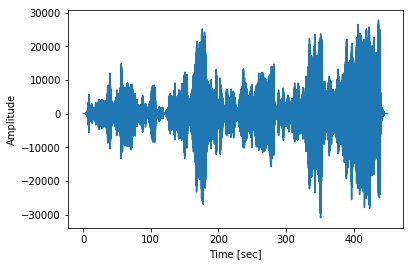

In [6]:
# plot time series
fig = plt.figure()
plt.plot(time,data_sc)
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude')
plt.show()

In [7]:
# short time fourier transform
f, t, Zxx = stft(data_sc, fs)
result = np.abs(Zxx)

In [ ]:
# process results for clearer plots
maxdB = 32767.    # maximum possible value
result_db = 20.*np.log10(np.abs(result/maxdB)+1e-5)    # convert to dB
# negative values will be a problem?
result_db = np.clip(result_db, -40, 200)   # clip results

In [ ]:
# plot spectogram
fig = plt.figure()
plt.pcolormesh(t, f, result_db)
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar()
plt.show()